In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **FLOW :-**
*              Understanding
*               Cleaning
*               Invalid values
*               binning
*               Visualization
  
*               Outlier treatment
*              Scaling
*               Encoding
          
*             feature extraction
 
*              Model selection
*              Evaluation

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [8]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [15]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [22]:
df.shape

166.0

In [21]:
print("avg. % of null values :", np.mean(df.isna().sum())/df.shape[0] * 100)

avg. % of null values : 1.9095824226389047


In [33]:
for index,col in enumerate(df.isna().sum()):
    per = col/df.shape[0] * 100
    print(f"percentage of null values in {df.columns[index]} :",per,"%")

percentage of null values in PassengerId : 0.0 %
percentage of null values in HomePlanet : 2.312205222592891 %
percentage of null values in CryoSleep : 2.4962613597147127 %
percentage of null values in Cabin : 2.289198205452663 %
percentage of null values in Destination : 2.093638559760727 %
percentage of null values in Age : 2.0591280340503855 %
percentage of null values in VIP : 2.3352122397331185 %
percentage of null values in RoomService : 2.082135051190613 %
percentage of null values in FoodCourt : 2.105142068330841 %
percentage of null values in ShoppingMall : 2.392729782583688 %
percentage of null values in Spa : 2.105142068330841 %
percentage of null values in VRDeck : 2.1626596111814105 %
percentage of null values in Name : 2.300701714022777 %
percentage of null values in Transported : 0.0 %


In [35]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [47]:
null_columns = df.columns[df.isnull().any()]

null_columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [48]:
categorical_cols = df.select_dtypes(exclude = ['int','float'])

numerical_cols = df.select_dtypes(include = ['int','float'])

In [50]:
categorical_cols.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')

In [51]:
numerical_cols.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [54]:
df1 = df.copy()

In [66]:
for col in numerical_cols:
    df1[col] = df1[col].fillna(np.mean(df1[col]))

In [73]:
for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

/tmp/ipykernel_33/1371670783.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].fillna(df1[col].mode()[0])


In [75]:
df1.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [90]:
for col in categorical_cols:
    print(f"Unique values in {col} :", df1[col].unique(), "count :",len(df1[col].unique()))

Unique values in PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] count : 8693
Unique values in HomePlanet : ['Europa' 'Earth' 'Mars'] count : 3
Unique values in CryoSleep : [False  True] count : 2
Unique values in Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] count : 6560
Unique values in Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'] count : 3
Unique values in VIP : [False  True] count : 2
Unique values in Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'] count : 8473
Unique values in Transported : [False  True] count : 2


In [79]:
unique_cols = [col for col in df.columns if len(df[col].unique()) < 15]

In [89]:
for col in unique_cols:
    print(df1[col].value_counts(),"\n") 

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64 

CryoSleep
False    5656
True     3037
Name: count, dtype: int64 

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64 

VIP
False    8494
True      199
Name: count, dtype: int64 

Transported
True     4378
False    4315
Name: count, dtype: int64 



In [98]:
df1.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [104]:
labels = ['0 - 500', '501 - 2500', '2501 - 5000', '>5000']
bins = [0,500,2500,5000,10000]

In [100]:
amenities = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [105]:
for col in amenities:
    df1[f'{col}_bins'] = pd.cut(df1[col],bins,labels = labels,include_lowest = True)

In [106]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,RoomService_bins,FoodCourt_bins,ShoppingMall_bins,Spa_bins,VRDeck_bins
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0 - 500,0 - 500,0 - 500,0 - 500,0 - 500
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0 - 500,0 - 500,0 - 500,501 - 2500,0 - 500
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0 - 500,2501 - 5000,0 - 500,>5000,0 - 500
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0 - 500,501 - 2500,0 - 500,2501 - 5000,0 - 500
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0 - 500,0 - 500,0 - 500,501 - 2500,0 - 500


In [130]:
df1[['RoomService','RoomService_bins']].head(50)

,RoomService,RoomService_bins
0,0.000000,0 - 500
1,109.000000,0 - 500
2,43.000000,0 - 500
3,0.000000,0 - 500
4,303.000000,0 - 500
5,0.000000,0 - 500
6,42.000000,0 - 500
7,0.000000,0 - 500
8,0.000000,0 - 500
9,0.000000,0 - 500


In [122]:
age_label = ['child','adult','between 30 & 60','older']
age_bins = [0,18,30,60,100]

df1['Age_bins'] = pd.cut(df1['Age'],age_bins,labels = age_label,include_lowest = True)

In [134]:
df1[['Age','Age_bins']].head(50)

,Age,Age_bins
0,39.0,between 30 & 60
1,24.0,adult
2,58.0,between 30 & 60
3,33.0,between 30 & 60
4,16.0,child
5,44.0,between 30 & 60
6,26.0,adult
7,28.0,adult
8,35.0,between 30 & 60
9,14.0,child


In [133]:
df1.query('Age_bins == "older"').head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,RoomService_bins,FoodCourt_bins,ShoppingMall_bins,Spa_bins,VRDeck_bins,Age_bins
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,173.729169,0.0,0.0,Penton Fullided,True,0 - 500,0 - 500,0 - 500,0 - 500,0 - 500,older
57,0062_01,Earth,False,F/13/S,TRAPPIST-1e,62.0,False,0.0,592.0,0.000000,17.0,25.0,Sterry Greeves,False,0 - 500,501 - 2500,0 - 500,0 - 500,0 - 500,older
60,0066_01,Earth,False,G/6/P,TRAPPIST-1e,62.0,False,1.0,153.0,197.000000,0.0,460.0,Diandy Pecketton,False,0 - 500,0 - 500,0 - 500,0 - 500,0 - 500,older
109,0113_01,Earth,False,F/23/P,TRAPPIST-1e,64.0,False,0.0,0.0,804.000000,0.0,0.0,Idary Carvis,True,0 - 500,0 - 500,501 - 2500,0 - 500,0 - 500,older
118,0126_01,Mars,True,F/27/S,TRAPPIST-1e,67.0,False,0.0,0.0,0.000000,0.0,0.0,Milly Mish,True,0 - 500,0 - 500,0 - 500,0 - 500,0 - 500,older


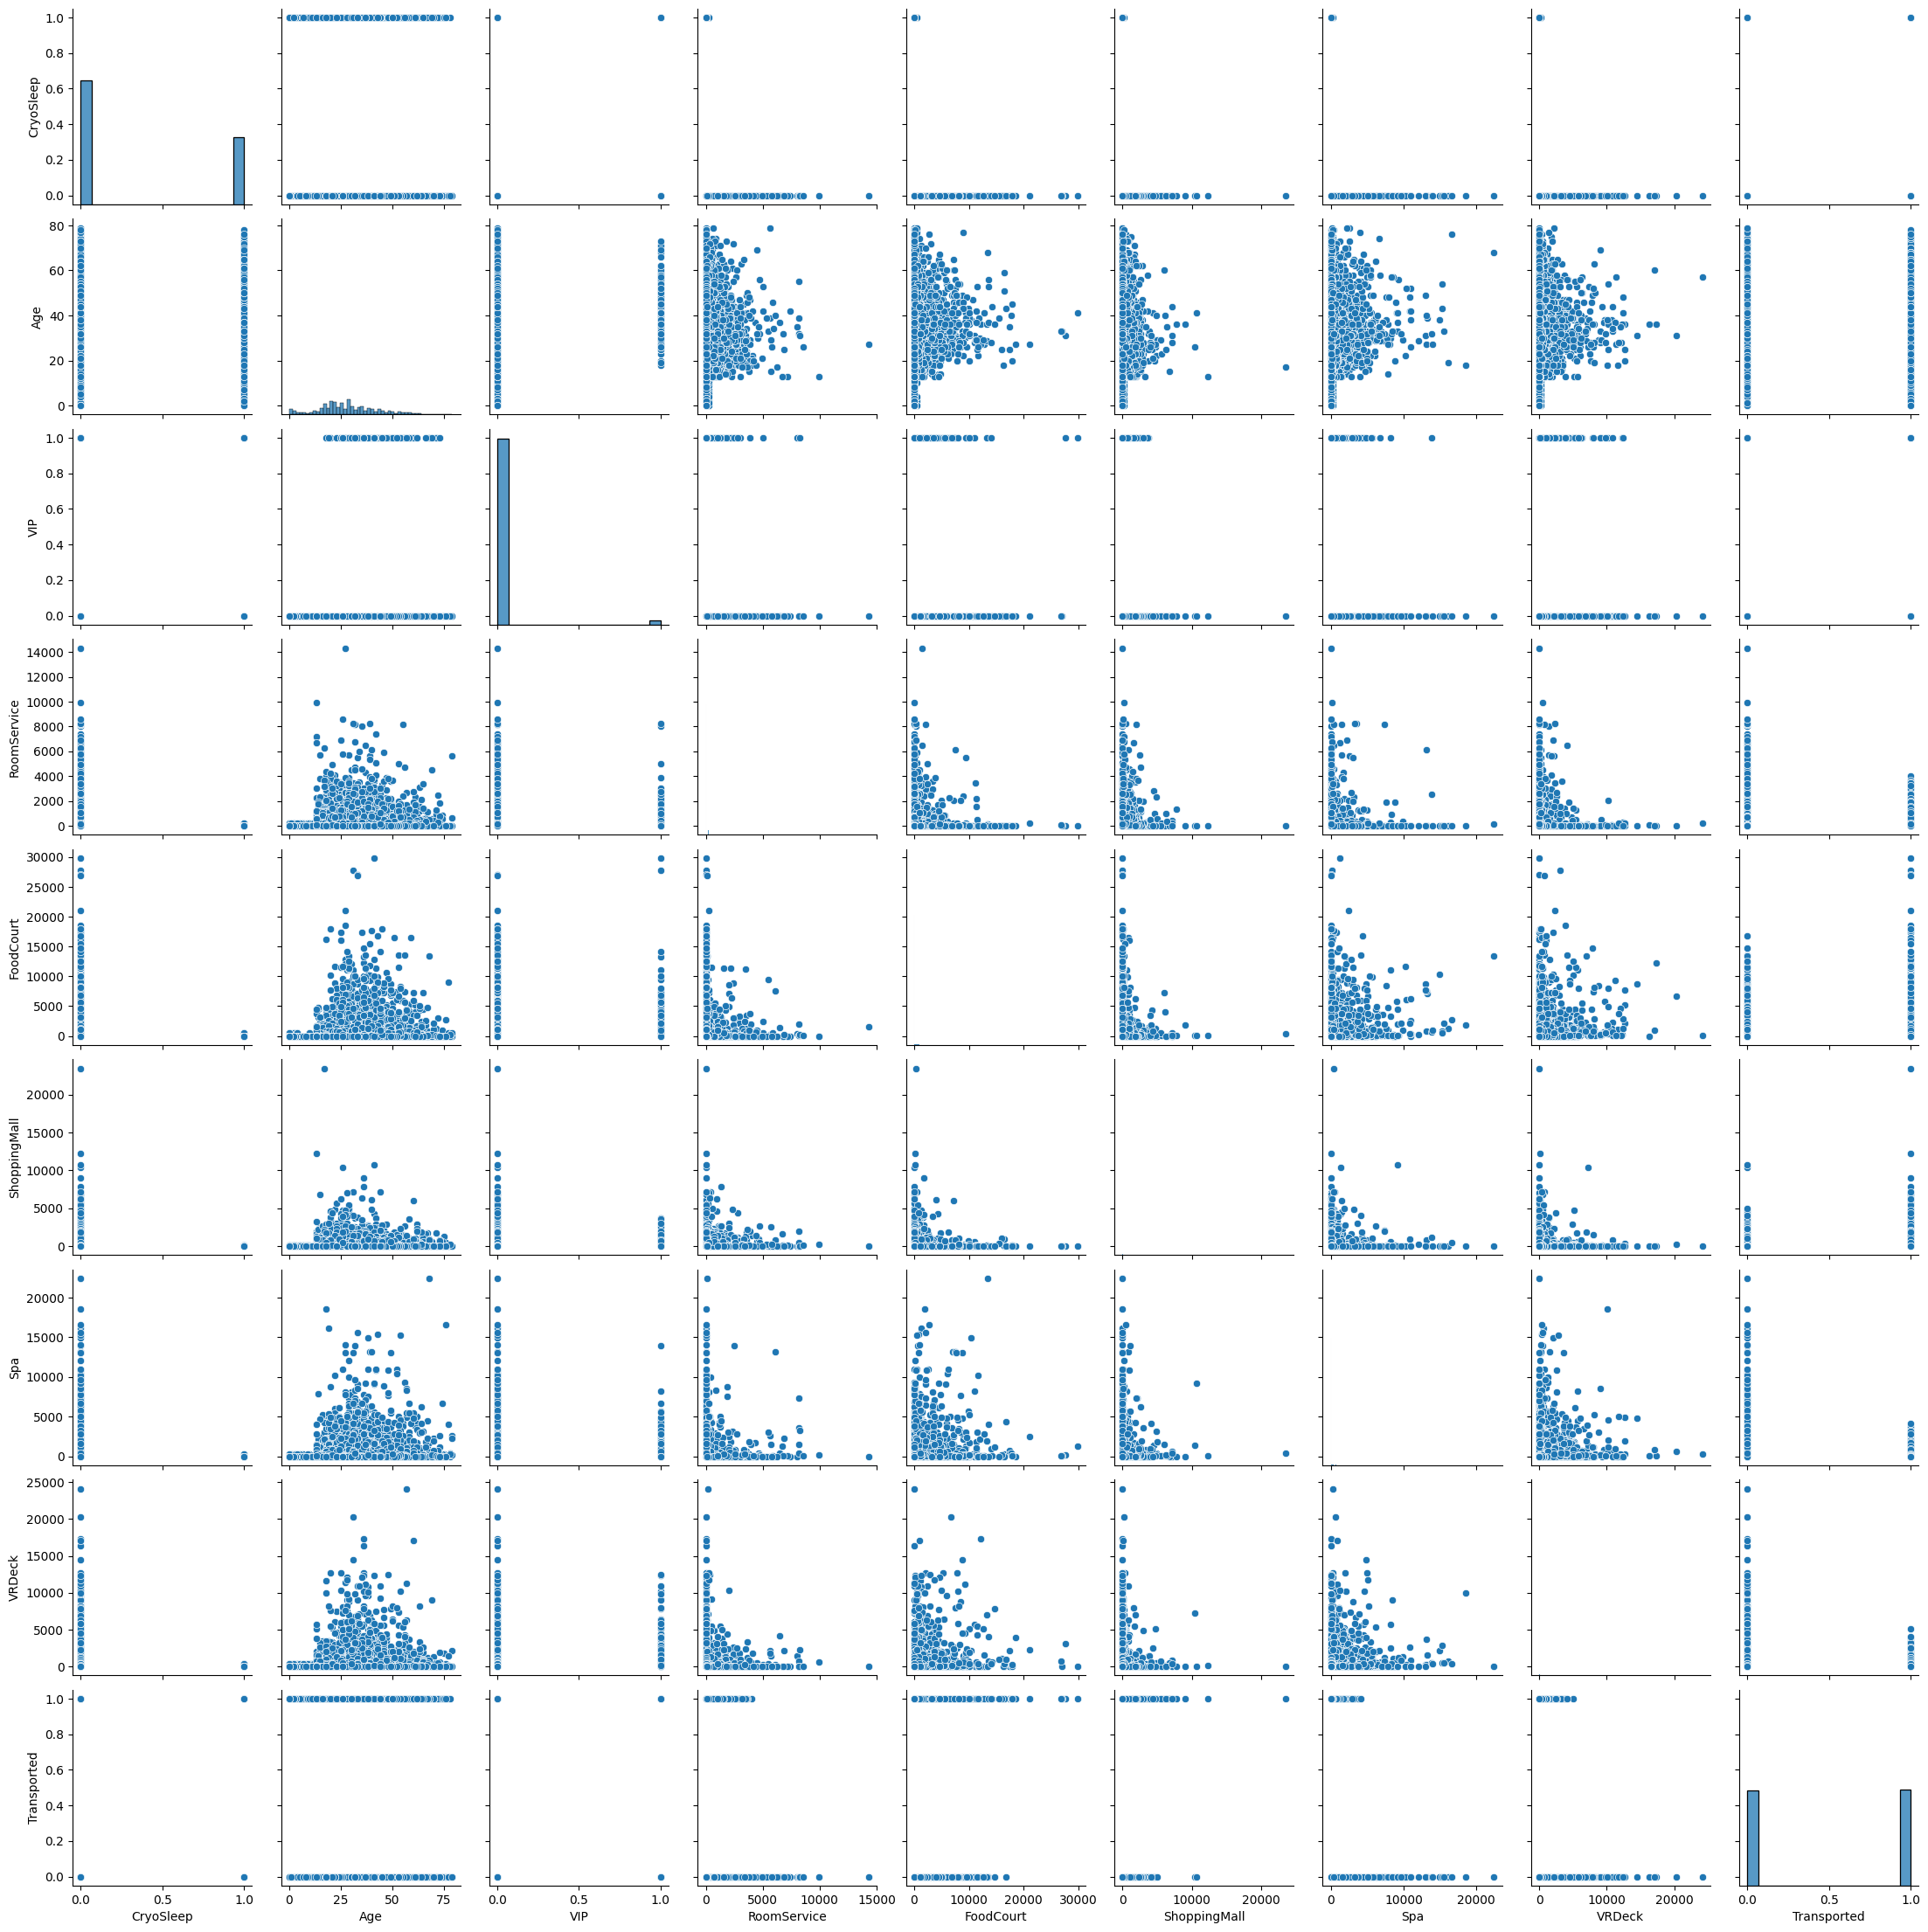

<Figure size 600x600 with 0 Axes>

In [137]:
sns.pairplot(df1)
plt.figure(figsize = [6,6])
plt.show()